# **Task 1: A and B (MxN = 1500x1500)**

In [1]:
import numpy as np

A = np.random.rand(1500, 1500)
B = np.random.rand(1500, 1500)

**Case A: (AxB)inverse = (B inverse x A inverse)**

In [2]:
AB = np.matmul(A,B)
(np.linalg.slogdet(A)[1] != 0) and (np.linalg.slogdet(B)[1] != 0) and (np.linalg.slogdet(AB)[1] != 0)

True

In [3]:
B_inv = np.linalg.inv(B)
A_inv = np.linalg.inv(A)
np.allclose(np.linalg.inv(AB),np.matmul(B_inv,A_inv)) 


True

**Case B: (A transpose)inverse = (A inverse)transpose**

In [4]:
np.allclose(np.linalg.inv(np.transpose(A)),np.transpose(A_inv))

True

**Case C: (@A)inverse = (1/@)A inverse** 


*@ is a real num*

In [5]:
a = 10
np.allclose(np.linalg.inv(a*A) , (1/a)*A_inv)

True

# **Task 2: 3x^2 + 8xz + 2y^2 + 6z^2**


**Case 1 : Create a matrix**

In [6]:
M = np.array([[3,8,0],[8,6,0],[0,0,2]])

**Case 2: Find eigenvalues and eigenvectors**

In [7]:
eig_val,eig_vec = np.linalg.eig(M)
eig_vec

array([[-0.76950911, -0.63863584,  0.        ],
       [ 0.63863584, -0.76950911,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

**Case 3: Type of U[eig_vec], result of Ux[x,y,z]transpose**

In [8]:
eig_vec.shape# quadratic

(3, 3)

In [9]:
np.matmul(eig_vec,np.array([[3],[6],[2]]))#changed vector pos and length in space

array([[-6.14034235],
       [-2.70114714],
       [ 2.        ]])

**Case 4:** 
Answer: "the equation is positive definite"

# **Task 3: Pandas and logistic regression**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [11]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)['frame']

In [12]:
#Descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
#Check correlation
HouseValCorr = df[df.columns[1:]].corr(method = "spearman")['MedHouseVal'][:]
HouseValCorr

HouseAge       0.074855
AveRooms       0.263367
AveBedrms     -0.125187
Population     0.003839
AveOccup      -0.256594
Latitude      -0.165739
Longitude     -0.069667
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [14]:
df[df.columns[1:]].corr(method = "pearson")['MedHouseVal'][:]

HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [15]:
pearsonr(df.MedHouseVal, df.AveRooms)

(0.1519482897414578, 7.569242134631997e-107)

In [16]:
pearsonr(df.MedHouseVal, df.Latitude)

(-0.14416027687465932, 2.9398592907424878e-96)

In [17]:
spearmanr(df.MedHouseVal, df.AveRooms)

SpearmanrResult(correlation=0.26336668772954447, pvalue=0.0)

In [18]:
spearmanr(df.MedHouseVal, df.Latitude)

SpearmanrResult(correlation=-0.1657388374452999, pvalue=4.994632332612018e-127)

In [19]:
HouseValCorr = HouseValCorr.drop(index='MedHouseVal')
HouseValCorr

HouseAge      0.074855
AveRooms      0.263367
AveBedrms    -0.125187
Population    0.003839
AveOccup     -0.256594
Latitude     -0.165739
Longitude    -0.069667
Name: MedHouseVal, dtype: float64

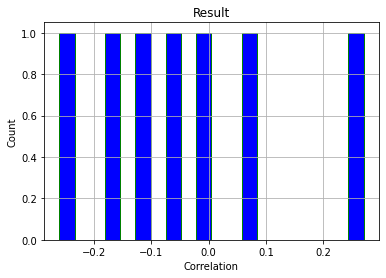

In [53]:
#Histogram
fig,ax = plt.subplots(1,1)
ax.hist(HouseValCorr,range=(-0.26,0.27),bins = 20,color='blue',edgecolor='green')
plt.grid(True)
ax.set_title("Result")
ax.set_xlabel('Correlation')
ax.set_ylabel('Count')
plt.show()

In [21]:
#split into training and test data
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [22]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc         11.511140
HouseAge        7.195917
AveRooms       45.993601
AveBedrms      43.590314
Population      2.935745
AveOccup        1.095243
Latitude      559.874071
Longitude     633.711654
dtype: float64

In [23]:
df.drop(columns=['Longitude'], inplace=True)


In [24]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc         9.865861
HouseAge       6.880512
AveRooms      42.192223
AveBedrms     39.768396
Population     2.793169
AveOccup       1.094908
Latitude      22.498755
dtype: float64

In [25]:
df.drop(columns=['AveRooms'], inplace=True)

In [26]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc         5.036342
HouseAge       6.660725
AveBedrms      6.430073
Population     2.752356
AveOccup       1.094801
Latitude      21.922515
dtype: float64

In [27]:
df.drop(columns=['Latitude'], inplace=True)

In [28]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

MedInc        3.801038
HouseAge      3.769898
AveBedrms     4.263506
Population    2.222516
AveOccup      1.094644
dtype: float64

In [29]:
df['const']=1

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y , train_size=0.7, random_state=42)

In [31]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     3038.
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:24:53   Log-Likelihood:                -17420.
No. Observations:               14447   AIC:                         3.485e+04
Df Residuals:                   14441   BIC:                         3.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.4343      0.004    121.622      0.0

In [32]:
#nothing to remove, p value = 0

In [33]:
y_hat_train = reg.predict(X_train)

In [34]:
residuals = y_train-y_hat_train

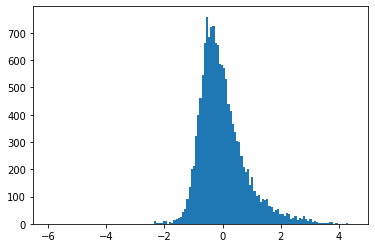

In [35]:
plt.hist(residuals, bins='fd')
plt.show()

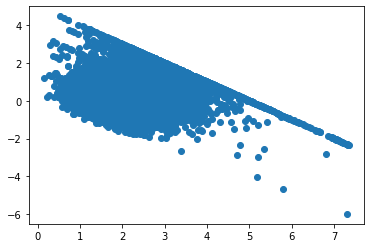

In [36]:
plt.scatter(y_hat_train, residuals)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


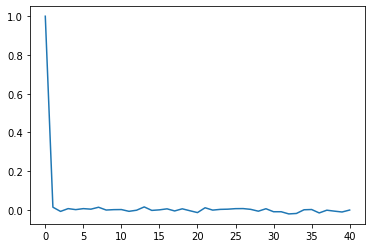

In [37]:
plt.plot(acf(residuals))
plt.show()

In [38]:
durbin_watson(residuals)

1.9718022154114128

In [39]:
#all of the above are correct according to OLS graph

In [40]:
#Linear Regression,MSE

poly_feat = PolynomialFeatures(degree=2)
df = poly_feat.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.7, random_state=42)
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [41]:
#coefficient of determination
lin_reg.score(X_train, y_train)

0.5462303163153764

In [45]:
y_hat_train = lin_reg.predict(X_train)
y_hat_test = lin_reg.predict(X_test)
print('MSE = ', mean_squared_error(y_train, y_hat_train))
print('MSE = ', mean_squared_error(y_test, y_hat_test))

MSE =  0.6079549577744788
MSE =  0.598359213741159


In [ ]:
# coeff. of determ. is low -> logarithms of vars might increase the potential, might have removed too many variables in the variance inflation

In [ ]:
#Tried Task 4 - but couldn't undertand a bit of the moodle presentations/scribbles, will research further.
#Commenter role applied - please do leave notes and further advice! Thank you!